In [3]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("clean_data.csv")
print(df.describe(include='object'))


C:\Users\ambra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Unnamed: 0.1        ID Customer_ID      Month    Name Occupation  \
count         150001    150000      150000     150000  135000     139500   
unique        150001    150000       12500         12   10139         15   
top                0  \n0x160a   CUS_0xd40  September  Stevex     Lawyer   
freq               1         1          12      12500      66       9899   

         Type_of_Loan Changed_Credit_Limit Credit_Mix  Credit_History_Age  \
count          132888               150000     120000              136500   
unique           6260                 3771          3                 408   
top     Not Specified                    _   Standard  17Yearsand11Months   
freq             2112                 3150      54858                 628   

       Payment_of_Min_Amount               Payment_Behaviour Credit_Score  
count                 150000                          138600       100000  
unique                     3                               6            3  
top  

In [5]:
df.Age.value_counts()

39.0      4198
32.0      4189
28.0      4173
26.0      4140
35.0      4130
          ... 
5795.0       1
2744.0       1
6452.0       1
5112.0       1
2263.0       1
Name: Age, Length: 2355, dtype: int64

<AxesSubplot:>

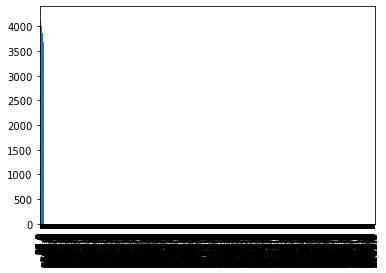

In [6]:
df.Age.value_counts().plot(kind='bar')

In [7]:
# get customer id for nan values in Name Column
customer_IDs = df[(df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)]['Customer_ID'].values

In [8]:
customer_IDs

array(['CUS_0xd40', 'CUS_0x95ee', 'CUS_0x4157', ..., 'CUS_0xf16',
       'CUS_0x8600', nan], dtype=object)

In [9]:
# get real age by customer id
for id in customer_IDs:
    realAge = 0
    try:
        realAge = df.loc[(df['Customer_ID'] == id) & (df['Age'].notna()) & (df['Age'] < 100) & (df['Age'] > 0)]['Age'].values[-1]
    except IndexError:
        continue
    # fill missing value
    df.loc[(df['Customer_ID'] == id) & ((df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)), ['Age']] = realAge

<AxesSubplot:>

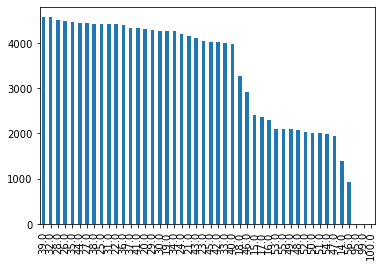

In [10]:
df.Age.value_counts().plot(kind='bar')

In [11]:
df['Annual_Income'].describe()

count    1.500000e+05
mean     1.730552e+05
std      1.404215e+06
min      7.005930e+03
25%      1.945549e+04
50%      3.757861e+04
75%      7.279690e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

<AxesSubplot:>

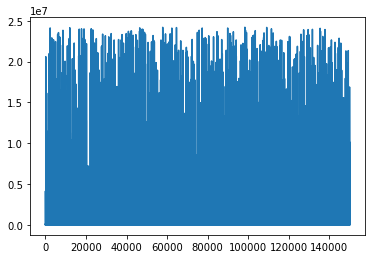

In [12]:
df.Annual_Income.plot(kind='line')

Credit History Age

In [14]:
def convert_to_years_months(duration):
    if isinstance(duration, float):
        return duration
    years = 0
    months = 0
    if 'Years' in duration:
        years = int(duration.split('Years')[0])
    if 'Months' in duration:
        months = int(duration.split('Months')[0].split('Yearsand')[-1])
    return years + months / 12

df['Credit_History_Age_float'] = df['Credit_History_Age'].apply(convert_to_years_months)

df.head()


,Unnamed: 0,Unnamed: 0.1,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_float
0,0,0,\n0x160a,CUS_0xd40,September,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,...,809.98,35.030402,22Yearsand9Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN,22.750000
1,1,1,\n0x160b,CUS_0xd40,October,Aaron Maashoh,24.0,Scientist,19114.12,1824.843333,...,809.98,33.053114,22Yearsand10Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN,22.833333
2,2,2,\n0x160c,CUS_0xd40,November,Aaron Maashoh,24.0,Scientist,19114.12,1824.843333,...,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,NaN,NaN
3,3,3,\n0x160d,CUS_0xd40,December,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,...,809.98,32.430559,23Yearsand0Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,NaN,23.000000
4,4,4,\n0x1616,CUS_0x21b1,September,Rick Rothackerj,28.0,NaN,34847.84,3037.986667,...,605.03,25.926822,27Yearsand3Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN,27.250000


In [15]:
df['Credit_History_Age_float'].describe()

count    136500.000000
mean         18.601277
std           8.309962
min           0.083333
25%          12.166667
50%          18.500000
75%          25.333333
max          34.000000
Name: Credit_History_Age_float, dtype: float64

<AxesSubplot:>

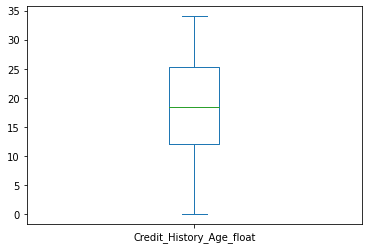

In [18]:
df['Credit_History_Age_float'].plot(kind='box')

Total EMI per Month

Amount invested monthly

Monthly balance